<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 09: Linear algebra - Lab statement </font></p>
</p></br>
</p>
</CENTER>

----------------------------

# Table of contents <a name="table-of-contents"></a>

1. [Array processing](#Array-processing)
2. [Denoising via Principal Component Analysis (PCA)](#PCA-denoising)


------------------------

##  <span style="color:#00B8DE"> I - Array processing: sources localization</span><a name="Array-processing"></a>
[Table of contents](#table-of-contents)


>- 1- Simulate $T=400$ the contributions of two sources with pulsations $0°$ and $50°$, observed on ana array of $N=16$ sensors in the presence of a spatialy white noise, with $SNR=20dB$.
>- 2- Implement the periodogram spectrum estimator and observe it for 10 realizations. Plot the averaged periodogram. Influence of the number of sensors and of the SNR?
>- 3- Test the resolution of the periodogram (capacity to separate close sources) for $N=16,64$, by changing the pulsation of the second source. 
>- 4- Implement MUSIC algorithm
>- 5- Test the influence of the parameters (number of sensors, SNR, ...)

In [33]:
using Plots
using Statistics: mean
using DSP
pyplot()

N    = 8
p    = 2
ϕ    = [0,5]*(π/180) 
T    = 400
SNR  = 20
σ    = 10^(-SNR/20)

#----------------
# Data generation
#----------------
s = zeros(p,T)
s[1,:] = sign.(sin.(2*pi*0.01*(1:T)))
s[2,:] = sqrt(2)*cos.(2pi*0.005*(1:T))

function noise(N,T)
    (rand(N,T)+im*rand(N,T))/sqrt(2)
end

dphi = exp.((0:N-1)*ϕ'*im)   #16*2
#data  = (s'dphi')'+ σ*noise(N,T) #16*400
data = dphi*noise(p,T) + σ*noise(N,T);
#---------------------
# Periodogram
#---------------------
#pd=periodogram(data[16,:])
#typeof(pd)


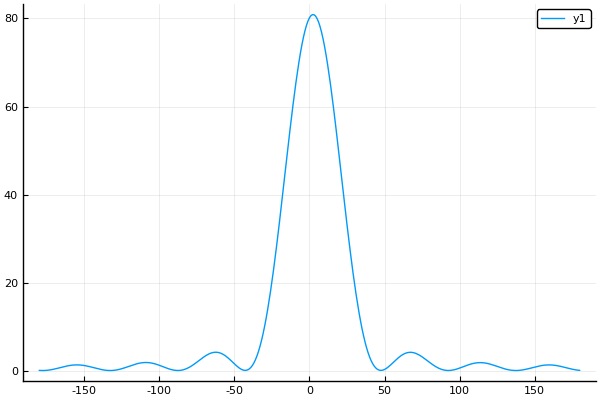

In [34]:
#pd=periodogram(data[1,:])
#plot(pd.freq[1:200], DSP.pow2db.(pd.power[1:200]))
#plot(pd.freq[1:20], pd.power[1:20])
cov_y_ch =(1/T)*data*data' #data[:,1:10]*data[:,1:10]'
ϕs=range(-180,stop=180)*(π/180) 
"""
gp=zeros(0)
for ϕ in ϕs
    dphi = exp.((0:N-1)*ϕ*im)    
    append!(gp,abs(dphi'*cov_y_ch*dphi))
end    
"""
d(ψ)   =exp.((0:N-1)*ψ*im)
gp(ψ) = abs(d(ψ)'*cov_y_ch*d(ψ))

plot(ϕs*180/π,gp.(ϕs))

[0.0006900340465403206, 0.0007567315023403324, 0.000811272382535111, 0.0008561451006172998, 0.0008969426892656262, 0.0009706393501459509, 0.013543768937163681, 10.114061747991514]
(8, 8)

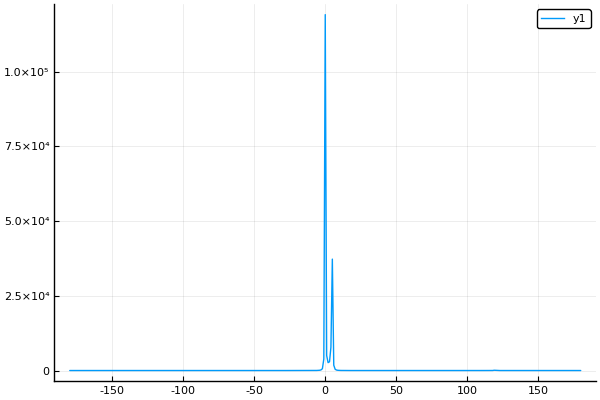

In [35]:
using LinearAlgebra: eigen
#cov_Y=data*data'./T #16*16
cov_Y=(1/T).*data*data'
eigs=eigen(cov_Y)
U=eigs.vectors[:,1:N-p] #16*14

ϕs=range(-180,stop=180)*(π/180) 
gs=zeros(0)
for ϕ in ϕs
    dphi = exp.((0:N-1)*ϕ*im) 
    h=abs(sum(U'*dphi))^2   
    g=1/h
    append!(gs,g)
end    
plot(ϕs*180/π,gs)

In [6]:
#------------------------------------------------
# Influence of second source location
# test for N=16,32,64
#------------------------------------------------
...

LoadError: syntax: invalid identifier name "..."

In [7]:
#----------------
# MUSIC algorithm
#----------------
using LinearAlgebra: eigen
#----------------
# Main parameters
#----------------
...

#----------------
# Data generation
#----------------
...

#----------------------
# Localization function
#----------------------
...
# periodogram
...

LoadError: syntax: invalid identifier name "..."

In [8]:
size(g)

UndefVarError: UndefVarError: g not defined

##  <span style="color:#00B8DE"> II - Denoising via Principal Component Analysis (PCA) </span><a name="PCA-denoising"></a>
[Table of contents](#table-of-contents)


> - 1- Generate $nb\_images= 50$ images representing the same function $f(x,y)=1_{\{x^2+y^2\leq 1\}}(x,y)$ over the area $[-1.2,-1.2]\times[1.2,1.2]$, each in the presence of white Gaussian noise with variance 1. Generated images will be of size $100\times 100$. Plot a few images using for instance contourf and plot visualization functions.
> - 2- Explain how SVD could be used to get a better image out of these.
> - 3- Implement the denoising procedure. Plot the corresponding result.
> - 4- Check numericaly the efficiency of the procedure (bias, variance, ...)
> - 5- Compare the results with a mean over images ...
> - 6- Assume now that images amplitudes $f(x,y)$ are in addition affected by a uniform normal Gaussian amplitude. What do you observe in this case?

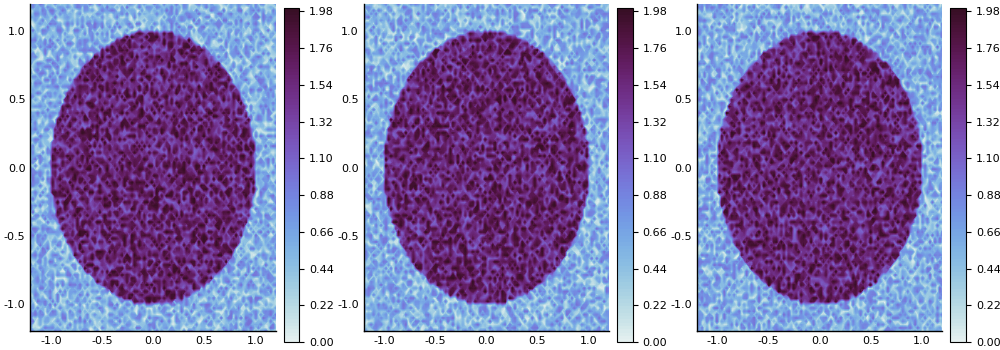

In [42]:
# Data generation
#----------------
using Plots
pyplot(size = (1000, 350))

nb_images = 50

f(x,y) = 1 .*(x .^2+y .^2 .<= 1)

n = 100
x = range(-1.2, stop=1.2, length= n)
y = range(-1.2, stop=1.2, length= n)

X= repeat(x', n, 1)
Y= repeat(y, 1, n)
Z = zeros(n, n, nb_images)

Z0 = f.(X, Y)
for k=1:nb_images
    Z[:,:,k] = Z0+rand(n, n)
end

fig1 = contourf(X, Y, Z[:,:,1], nlevels = 100, c=:dense, label="")
fig2 = contourf(X, Y, Z[:,:,2], nlevels = 100, c=:dense, label="")
fig3 = contourf(X, Y, Z[:,:,3], nlevels = 100, c=:dense, label="")#, nlevels = 100, c=:dense, label="")

plot(fig1, fig2, fig3, layout=(1,3))

In [43]:
# SVD
A = reshape(Z, (10000,50))
F = svd(A);

In [44]:
A_reconstrui = reshape(F.U[:,1], (10000,1)) * Diagonal([F.S[1]])* reshape(F.Vt[1, :], (1,50));

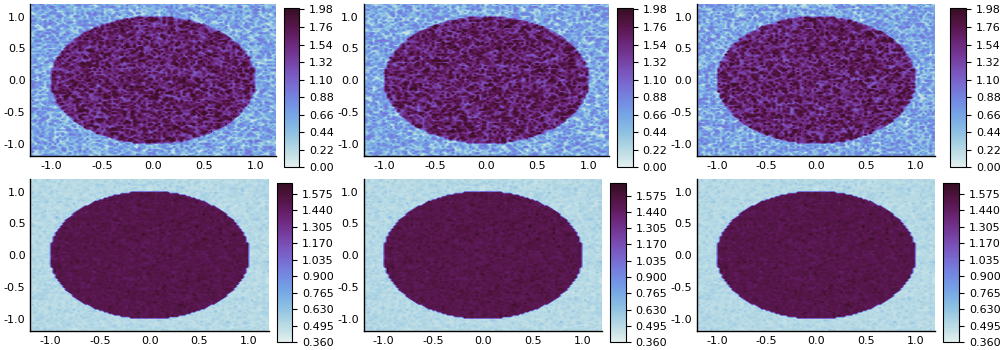

In [45]:
image4 = A_reconstrui[:,1]
image5 = A_reconstrui[:,2]
image6 = A_reconstrui[:,3]
image4 = reshape(image4, (100,100))
image5 = reshape(image5, (100,100))
image6 = reshape(image6, (100,100))
fig4 = contourf(X, Y, image4, nlevels = 100, c=:dense, label="")
fig5 = contourf(X, Y, image5, nlevels = 100, c=:dense, label="")
fig6 = contourf(X, Y, image6, nlevels = 100, c=:dense, label="")
plot(fig1, fig2, fig3, fig4, fig5, fig6, layout=(2,3))
# Mean and MSE
#-------------

In [49]:
"""println("Image 1 ")
println(minimum(image1))
println(maximum(image1))

println("Image 4")
println(minimum(image4))
println(maximum(image4))
"""

println(norm(Z[:,:,1] - Z0))
println(norm(image4 - Z0))


57.670231016393004
50.23174871978443


In [12]:
# 2nd case: random amplitudes
#-----------------------------
...

LoadError: syntax: invalid identifier name "..."